INCUBATOR START...


enter pls target word: CAT
enter size population: 1000
enter chance mutation: 1
enter chance crossing: 100
ERA # 14

result population:

...
A@V
B@T
BAT
CAT
CCT
ABT
BBV
...


INCUBATOR END.


[0.11978243827074593, 0.13957875683699938, 0.1951941016011038, 0.16952084719853724, 0.25, 0.25, 0.3090169943749474, 0.28989794855663564, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0] ['>FR', '>>R', 'EDV', '??R', 'CDT', 'ABR', 'C@R', 'D@V', 'C@T', 'DAT', 'DAT', 'DAT', 'DAT', 'DAT', 'CAT']


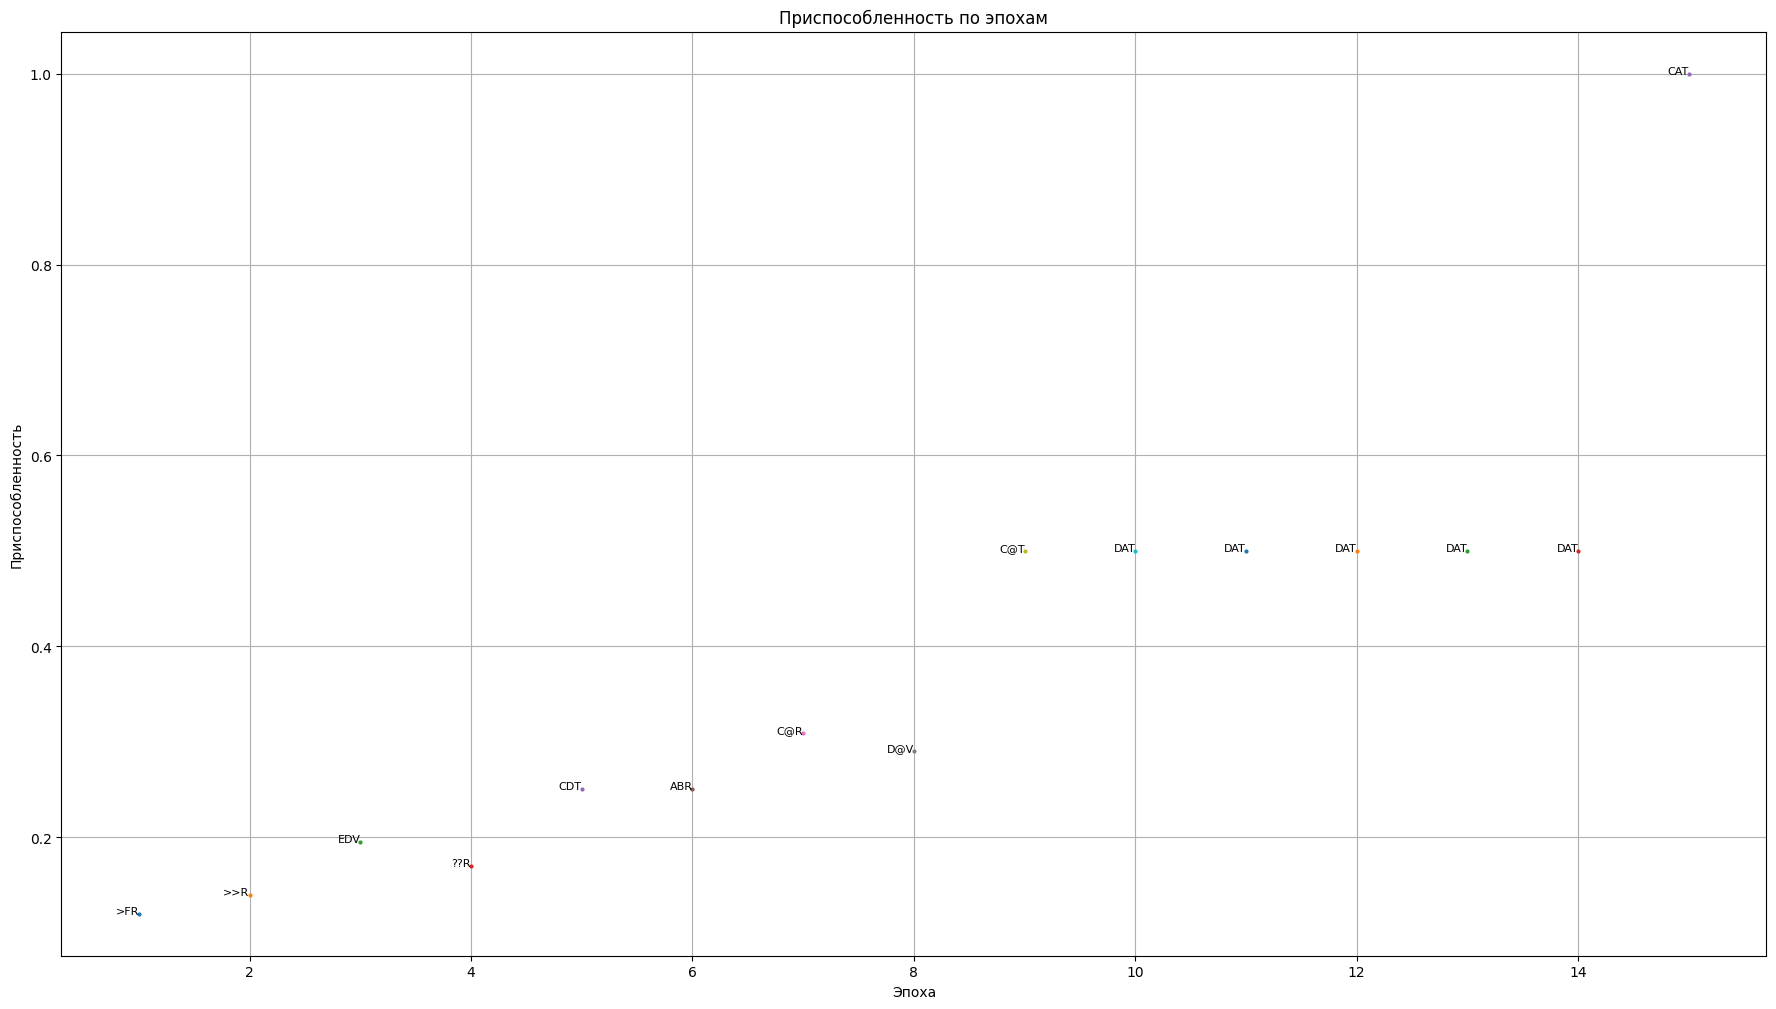

In [1]:
# GeneticAlgorithm - generate word (length = 3)
import random, math

def generate_word():
    wrod = ''
    return chr(random.randint(0, 255)) + chr(random.randint(0, 255)) + chr(random.randint(0, 255))

def create_population(num_individs):
    start_population = []
    for _ in range(num_individs):
        start_population.append(generate_word())
    return start_population

def coeff_word(word):
    x = ord(word[0])
    y = ord(word[1])
    z = ord(word[2])
    return x,y,z

def fitness(individ, target_word):
    x,y,z = coeff_word(individ)
    x_trgt,y_trgt,z_trgt = coeff_word(target_word)
    d = math.sqrt((x - x_trgt) ** 2 + (y - y_trgt) ** 2 + (z - z_trgt) ** 2)
    F = 1 / (1 + d)
    return F

def all_fitness(population, target_word):
    pop_fit = []
    for i in range(len(population)):
        pop_fit.append(fitness(population[i], target_word))
        # print(f"Приспособленность особи #{i+1} равна: {pop_fit[i]}\n")
    return pop_fit

def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = max(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
    return selected_individs

def to_binary(individ):
    bin_code = ""
    for ch in individ:
        el = ord(ch)
        bin_code += "{0:b}".format(el).zfill(8);
    return bin_code

def to_word(bin_code):
    word = ''
    for i in range(0, len(bin_code), 8):
        word+=chr(int(bin_code[i:i + 8], 2))
    return word

def all_to_binary(population):
    binary_pop = []
    for individ in population:
        binary_pop.append(to_binary(individ))
    return binary_pop

def all_to_word(population):
    word_pop = []
    for individ in population:
        word_pop.append(to_word(individ))
    return word_pop

def crossover(parent_1, parent_2):
    # dot = random.randint(0, len(parent_1) - 1)
    # return parent_1[:dot] + parent_2[dot:],parent_2[:dot] + parent_1[dot:]
    # return parent_1[:12] + parent_2[12:],parent_2[:12] + parent_1[12:]

    point1 = random.randint(0, len(parent_1) - 1)
    point2 = random.randint(0, len(parent_1) - 1)
    if point1 > point2:
        point1, point2 = point2, point1
    child_1 = parent_1[:point1] + parent_2[point1:point2] + parent_1[point2:]
    child_2 = parent_2[:point1] + parent_1[point1:point2] + parent_2[point2:]
    return child_1, child_2

def mutation(bin_individ, chance):
    res = ""
    for symb in bin_individ:
        if (chance > random.random()):
            res += "1" if symb == '0' else '0'
        else:
            res += symb
    return res

def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, chance_mutation))
            new_pop.append(mutation(child_2, chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop

def print_array(array):
    for el in array:
        print(el)

def MAXFIT_WORD(pop, all_fitness):
  max_fitness_individ = all_fitness.index(max(all_fitness))
  best_word = pop[max_fitness_individ]
  return best_word, all_fitness[max_fitness_individ]

def INCUBATOR():
    print("INCUBATOR START...\n\n")
    target_word = str(input("enter pls target word: "))
    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    start_population = create_population(size_population)
    # print("start pop:\n", start_population)
    # print("\n---------------------------------------------------------\n")
    result_population = start_population

    # for static
    fitness_of_best_words_for_static = []
    best_words_for_static = []
    # end.

    for era in range(100000):
        population_fitness = all_fitness(result_population, target_word)
        # for static
        b_word, b_fit = MAXFIT_WORD(result_population, population_fitness)
        fitness_of_best_words_for_static.append(b_fit)
        best_words_for_static.append(b_word)
        # end
        if 1 in population_fitness:
            # print(f"ERA #{era}\nresult population:\n")
            print("ERA #", era)
            print("\nresult population:\n")
            index = population_fitness.index(1)
            res_pop = result_population[index - 3:index + 4]
            print("...")
            print_array(res_pop)
            print("...")
            print("\n\nINCUBATOR END.\n\n")
            break

        population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population/3), 3)
        binary_population_for_crossover = all_to_binary(population_for_crossover)
        new_population = crossing(binary_population_for_crossover, chance_crossing, chance_mutation, size_population)
        new_population = all_to_word(new_population)
        result_population = new_population

        # print(f"ERA #{era}\nresult population:\n",result_population)
        # print("ERA #",era)
        # print("\nresult population:\n")
        # print_array(result_population)
    return fitness_of_best_words_for_static, best_words_for_static

# MAIN
static, words = INCUBATOR()

print(static, words)

import matplotlib.pyplot as plt

def plot_fitness_by_epoch(fitness_by_epoch, best_words_by_epoch):
  epochs = range(1, len(fitness_by_epoch) + 1) # Эпохи начинаются с 1
  plt.figure(figsize=(22, 12))

  for epoch, (fitness, word) in enumerate(zip(fitness_by_epoch, best_words_by_epoch), start=1):
    plt.plot(epoch, fitness, marker='o', markersize=2, label=f'Epoch {epoch}')
    plt.text(epoch, fitness, word, fontsize=8, ha='right', color='black')

  plt.xlabel('Эпоха')
  plt.ylabel('Приспособленность')
  plt.title('Приспособленность по эпохам')
  plt.grid(True)
  plt.show()

if (len(static) < 500):
    plot_fitness_by_epoch(static, words)


INCUBATOR START...


enter pls target word: Python
enter size population: 1200
enter chance mutation: 1
enter chance crossing: 100
ERA # 19

result population:

...
Pzthon
Pzth/n
Pzthon
Python
Pzthon
Pzthgn
Pzthoî
...


INCUBATOR END.


[0.016643176214008536, 0.024105351013427544, 0.038882646210846805, 0.0734779760311297, 0.0734779760311297, 0.09682998898940481, 0.15894454156034005, 0.3090169943749474, 0.3090169943749474, 0.3333333333333333, 0.4142135623730951, 0.4142135623730951, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0] ['(_^[d\x83', 'f\x88\x87}wf', 'Q~\x88]wn', 'Qvvqwn', 'Qvvqwn', 'Qvvkwn', 'Q~uion', 'Qzuioo', 'Qzuioo', 'Qzuion', 'Pztion', 'Pztion', 'Pzthon', 'Pzthon', 'Pzthon', 'Pzthon', 'Pzthon', 'Pzthon', 'Pzthon', 'Python']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


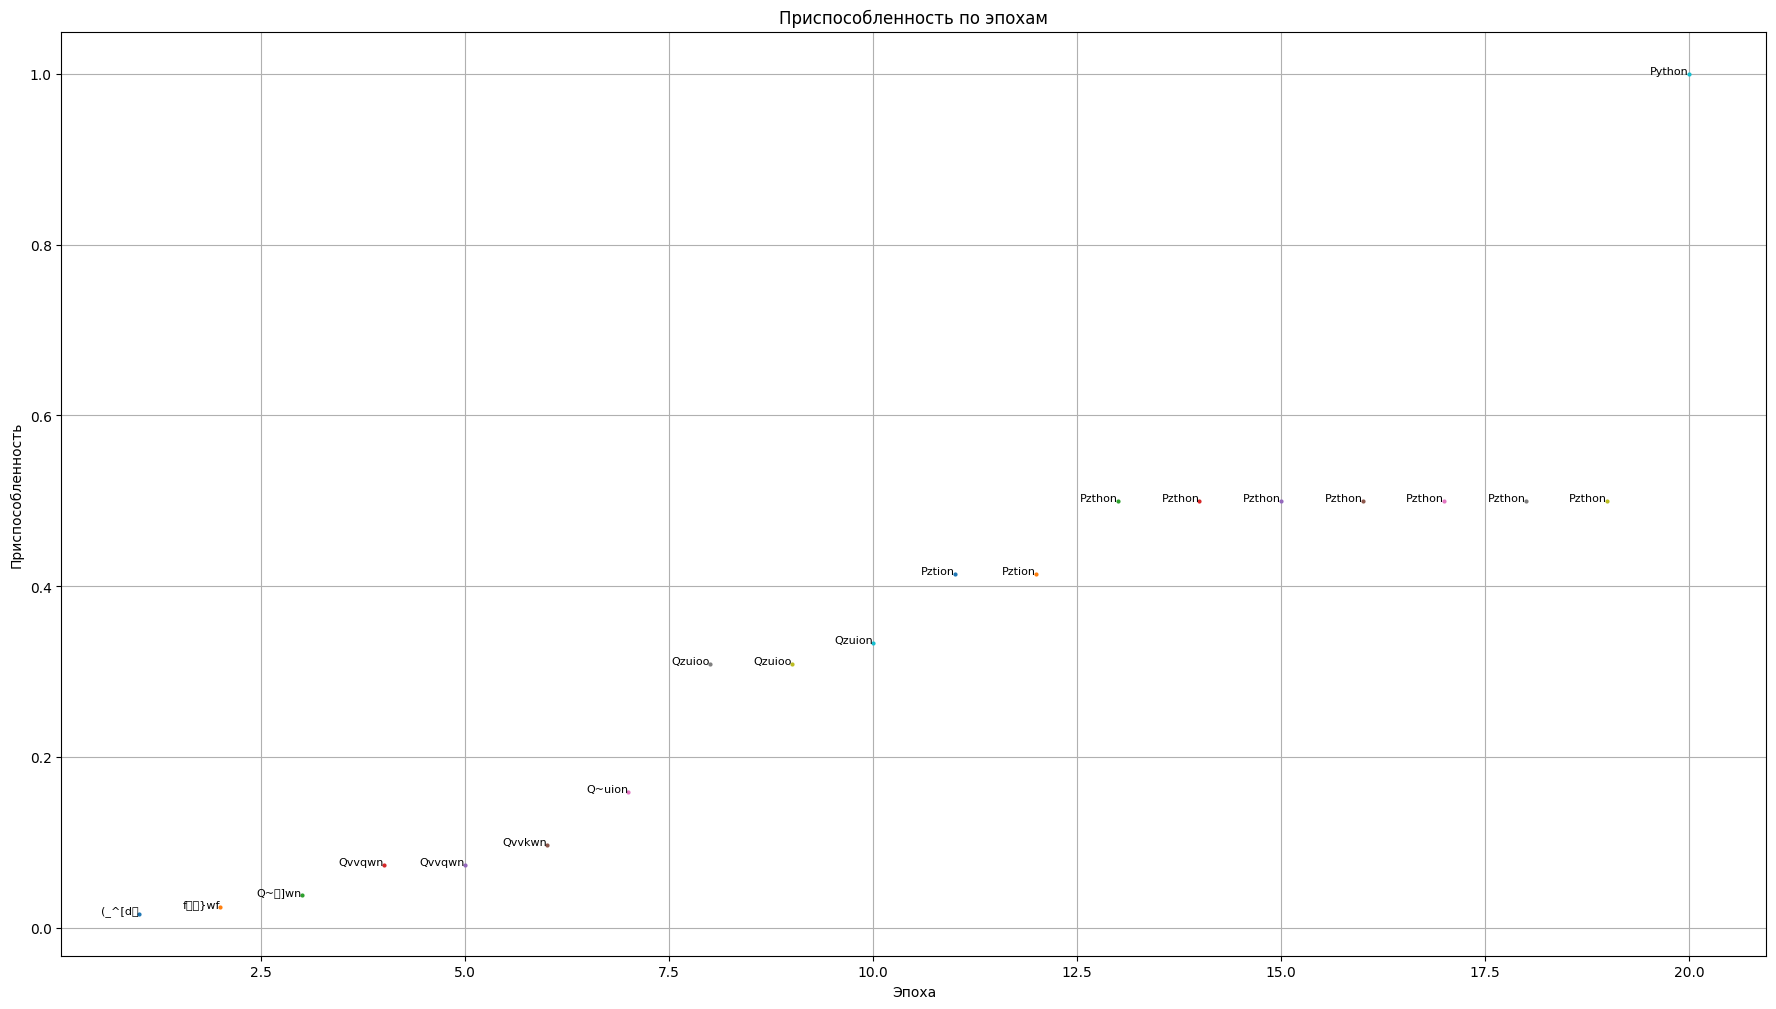

In [8]:
# GeneticAlgorithm - generate word (length = N) ENG
import random, math

def generate_word(len_word):
    word = ''
    for _ in range(len_word):
      word +=  chr(random.randint(0, 255))
    return word

def create_population(num_individs, len_word):
    start_population = []
    for _ in range(num_individs):
        start_population.append(generate_word(len_word))
    return start_population

def coeff_word(word):
    coeffs = []
    for ch in word:
      coeffs.append(ord(ch))
    return coeffs

def fitness(individ, target_word):
    coeffs = coeff_word(individ)
    coeffs_target_word = coeff_word(target_word)
    t = 0;
    for i in range(len(target_word)):
      t += (coeffs[i] - coeffs_target_word[i]) ** 2
    d = math.sqrt(t)
    F = 1 / (1 + d)
    return F

def all_fitness(population, target_word):
    pop_fit = []
    for i in range(len(population)):
        pop_fit.append(fitness(population[i], target_word))
        # print(f"Приспособленность особи #{i+1} равна: {pop_fit[i]}\n")
    return pop_fit

def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = max(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
    return selected_individs

def to_binary(individ):
    bin_code = ""
    for ch in individ:
        el = ord(ch)
        bin_code += "{0:b}".format(el).zfill(8);
    return bin_code

def to_word(bin_code):
    word = ''
    for i in range(0, len(bin_code), 8):
        word+=chr(int(bin_code[i:i + 8], 2))
    return word

def all_to_binary(population):
    binary_pop = []
    for individ in population:
        binary_pop.append(to_binary(individ))
    return binary_pop

def all_to_word(population):
    word_pop = []
    for individ in population:
        word_pop.append(to_word(individ))
    return word_pop

def crossover(parent_1, parent_2):
    # dot = random.randint(0, len(parent_1) - 1)
    # return parent_1[:dot] + parent_2[dot:],parent_2[:dot] + parent_1[dot:]
    # return parent_1[:12] + parent_2[12:],parent_2[:12] + parent_1[12:]

    point1 = random.randint(0, len(parent_1) - 1)
    point2 = random.randint(0, len(parent_1) - 1)
    if point1 > point2:
        point1, point2 = point2, point1
    child_1 = parent_1[:point1] + parent_2[point1:point2] + parent_1[point2:]
    child_2 = parent_2[:point1] + parent_1[point1:point2] + parent_2[point2:]
    return child_1, child_2

def mutation(bin_individ, chance):
    res = ""
    for symb in bin_individ:
        if (chance > random.random()):
            res += "1" if symb == '0' else '0'
        else:
            res += symb
    return res

def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, chance_mutation))
            new_pop.append(mutation(child_2, chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop

def print_array(array):
    for el in array:
        print(el)

def MAXFIT_WORD(pop, all_fitness):
  max_fitness_individ = all_fitness.index(max(all_fitness))
  best_word = pop[max_fitness_individ]
  return best_word, all_fitness[max_fitness_individ]

def INCUBATOR():
    print("INCUBATOR START...\n\n")
    target_word = str(input("enter pls target word: "))
    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    start_population = create_population(size_population, len(target_word))
    # print("start pop:\n", start_population)
    # print("\n---------------------------------------------------------\n")
    result_population = start_population

    # for static
    fitness_of_best_words_for_static = []
    best_words_for_static = []
    # end.

    for era in range(150000):
        population_fitness = all_fitness(result_population, target_word)
        # for static
        b_word, b_fit = MAXFIT_WORD(result_population, population_fitness)
        fitness_of_best_words_for_static.append(b_fit)
        best_words_for_static.append(b_word)
        # end
        if 1 in population_fitness:
            # print(f"ERA #{era}\nresult population:\n")
            print("ERA #", era)
            print("\nresult population:\n")
            index = population_fitness.index(1)
            res_pop = result_population[index - 3:index + 4]
            print("...")
            print_array(res_pop)
            print("...")
            print("\n\nINCUBATOR END.\n\n")
            break

        population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population/5), 10)
        binary_population_for_crossover = all_to_binary(population_for_crossover)
        new_population = crossing(binary_population_for_crossover, chance_crossing, chance_mutation, int(size_population/2))
        new_population = all_to_word(new_population)
        result_population = new_population

        # print(f"ERA #{era}\nresult population:\n",result_population)
        # print("ERA #",era)
        # print("\nresult population:\n")
        # print_array(result_population)
    return fitness_of_best_words_for_static, best_words_for_static

# MAIN
static, words = INCUBATOR()

print(static, words)

import matplotlib.pyplot as plt

def plot_fitness_by_epoch(fitness_by_epoch, best_words_by_epoch):
  epochs = range(1, len(fitness_by_epoch) + 1) # Эпохи начинаются с 1
  plt.figure(figsize=(22, 12))

  for epoch, (fitness, word) in enumerate(zip(fitness_by_epoch, best_words_by_epoch), start=1):
    plt.plot(epoch, fitness, marker='o', markersize=2, label=f'Epoch {epoch}')
    plt.text(epoch, fitness, word, fontsize=8, ha='right', color='black')

  plt.xlabel('Эпоха')
  plt.ylabel('Приспособленность')
  plt.title('Приспособленность по эпохам')
  plt.grid(True)
  plt.show()

if (len(static) < 200):
    plot_fitness_by_epoch(static, words)


INCUBATOR START...


enter pls target word: ГенетическийАлгоритм
enter size population: 10000
enter chance mutation: 1
enter chance crossing: 100
ERA # 35

result population:

...
ГеоетическийАмгпрзтм
ГеоеукчесйийАлгорйтм
ЛенжТичҵуйййАкдпритм
ГенетическийАлгоритм
ГбмдтичесйѸйАлдприум
ГбнетичесйийАмгорирм
ГеоетичеслйщАмгорзтм
...


INCUBATOR END.


[0.01843178406447174, 0.02491232631062172, 0.026075824098971447, 0.02886402093945309, 0.03205196239416355, 0.03919216890710421, 0.04464099465871488, 0.052863977709902865, 0.056582425994704214, 0.06316163001913848, 0.06883378713444331, 0.08598344475655936, 0.1060878539025194, 0.0994491992362644, 0.1111111111111111, 0.13367660240019172, 0.1365270594958143, 0.15894454156034005, 0.1757340838011157, 0.179128784747792, 0.1907435698305462, 0.21089672205953397, 0.2240092377397959, 0.2402530733520421, 0.25, 0.27429188517743175, 0.3090169943749474, 0.28989794855663564, 0.3333333333333333, 0.3333333333333333, 0.36602540378443865, 0.4142135623730951, 0.5

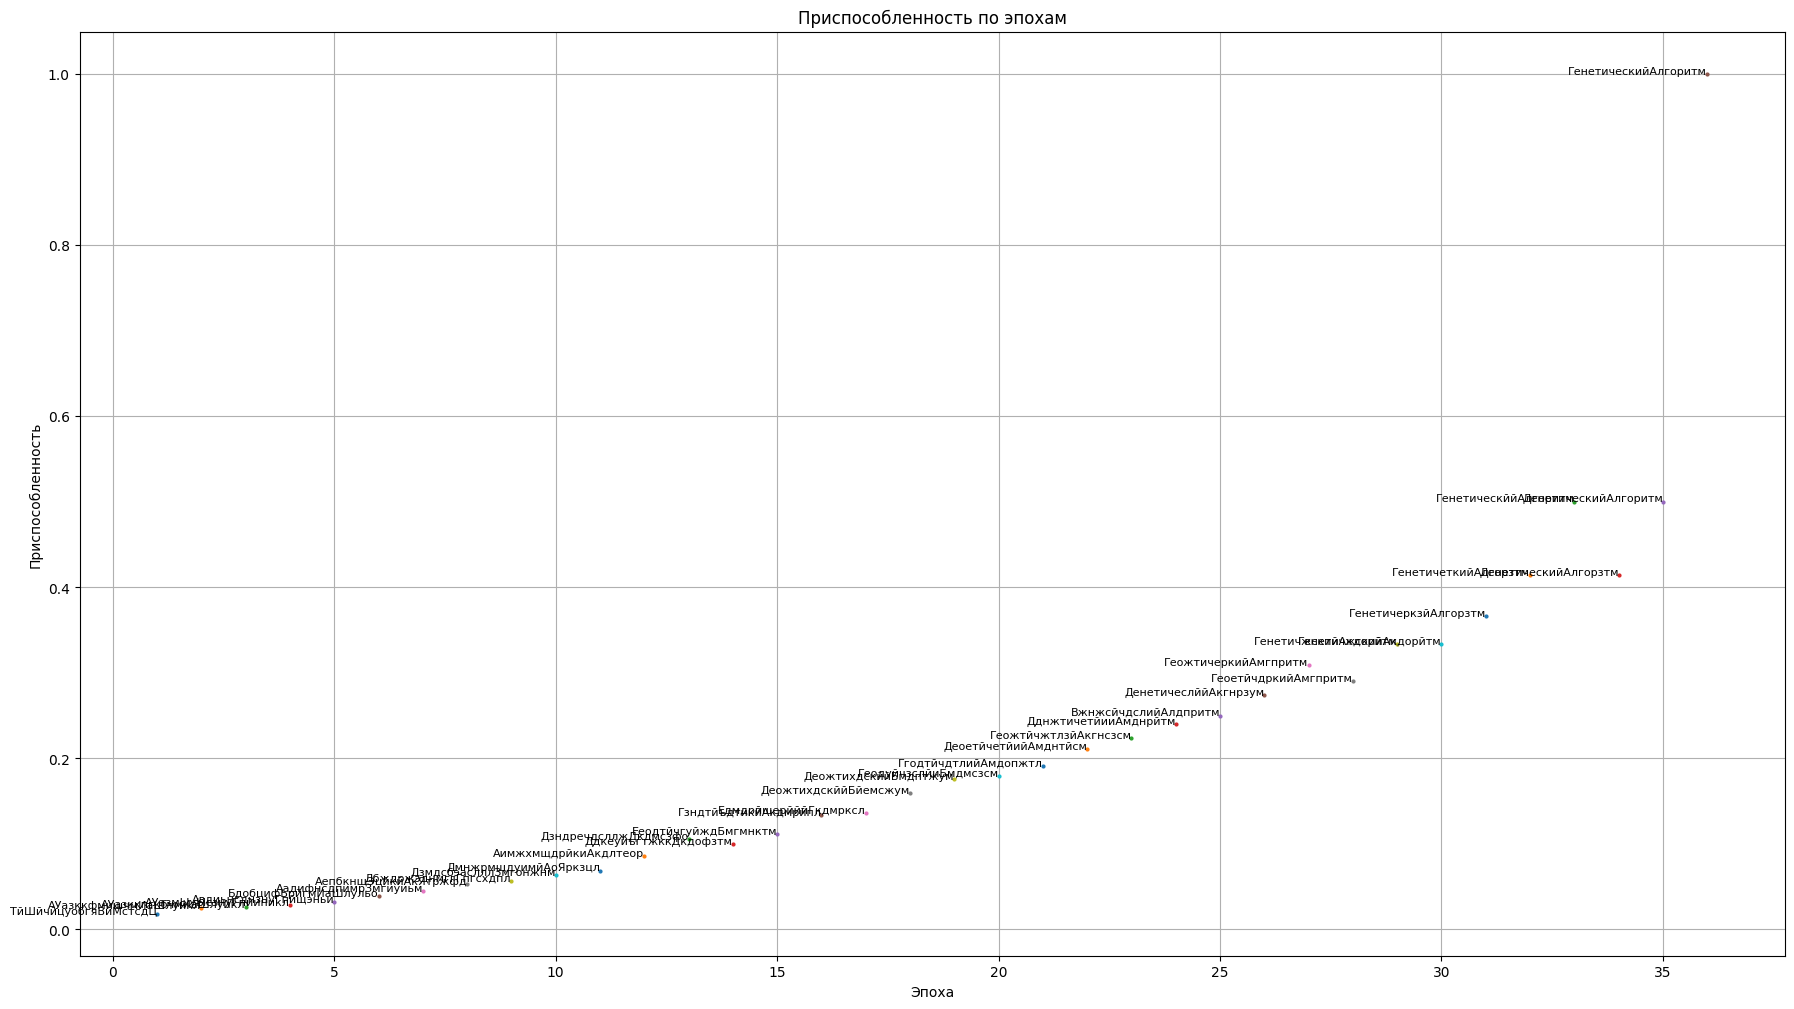

In [11]:
# GeneticAlgorithm - generate word (length = N) RUS
import random, math

def generate_word(len_word):
    word = ''
    for _ in range(len_word):
      word +=  chr(random.randint(1040, 1103))
    return word

def create_population(num_individs, len_word):
    start_population = []
    for _ in range(num_individs):
        start_population.append(generate_word(len_word))
    return start_population

def coeff_word(word):
    coeffs = []
    for ch in word:
      coeffs.append(ord(ch))
    return coeffs

def fitness(individ, target_word):
    coeffs = coeff_word(individ)
    coeffs_target_word = coeff_word(target_word)
    t = 0;
    for i in range(len(target_word)):
      t += (coeffs[i] - coeffs_target_word[i]) ** 2
    d = math.sqrt(t)
    F = 1 / (1 + d)
    return F

def all_fitness(population, target_word):
    pop_fit = []
    for i in range(len(population)):
        pop_fit.append(fitness(population[i], target_word))
        # print(f"Приспособленность особи #{i+1} равна: {pop_fit[i]}\n")
    return pop_fit

def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = max(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
    return selected_individs

def to_binary(individ):
    bin_code = ""
    for ch in individ:
        el = ord(ch) - 1040
        bin_code += "{0:b}".format(el).zfill(8);
    return bin_code

def to_word(bin_code):
    word = ''
    for i in range(0, len(bin_code), 8):
        word+=chr(int(bin_code[i:i + 8], 2) + 1040)
    return word

def all_to_binary(population):
    binary_pop = []
    for individ in population:
        binary_pop.append(to_binary(individ))
    return binary_pop

def all_to_word(population):
    word_pop = []
    for individ in population:
        word_pop.append(to_word(individ))
    return word_pop

def crossover(parent_1, parent_2):
    # dot = random.randint(0, len(parent_1) - 1)
    # return parent_1[:dot] + parent_2[dot:],parent_2[:dot] + parent_1[dot:]
    # return parent_1[:12] + parent_2[12:],parent_2[:12] + parent_1[12:]

    point1 = random.randint(0, len(parent_1) - 1)
    point2 = random.randint(0, len(parent_1) - 1)
    if point1 > point2:
        point1, point2 = point2, point1
    child_1 = parent_1[:point1] + parent_2[point1:point2] + parent_1[point2:]
    child_2 = parent_2[:point1] + parent_1[point1:point2] + parent_2[point2:]
    return child_1, child_2

def mutation(bin_individ, chance):
    res = ""
    for symb in bin_individ:
        if (chance > random.random()):
            res += "1" if symb == '0' else '0'
        else:
            res += symb
    return res

def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, chance_mutation))
            new_pop.append(mutation(child_2, chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop

def print_array(array):
    for el in array:
        print(el)

def MAXFIT_WORD(pop, all_fitness):
  max_fitness_individ = all_fitness.index(max(all_fitness))
  best_word = pop[max_fitness_individ]
  return best_word, all_fitness[max_fitness_individ]

def INCUBATOR():
    print("INCUBATOR START...\n\n")
    target_word = str(input("enter pls target word: "))
    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    start_population = create_population(size_population, len(target_word))
    # print("start pop:\n", start_population)
    # print("\n---------------------------------------------------------\n")
    result_population = start_population

    # for static
    fitness_of_best_words_for_static = []
    best_words_for_static = []
    # end.

    for era in range(150000):
        population_fitness = all_fitness(result_population, target_word)
        # for static
        b_word, b_fit = MAXFIT_WORD(result_population, population_fitness)
        fitness_of_best_words_for_static.append(b_fit)
        best_words_for_static.append(b_word)
        # end
        if 1 in population_fitness:
            # print(f"ERA #{era}\nresult population:\n")
            print("ERA #", era)
            print("\nresult population:\n")
            index = population_fitness.index(1)
            res_pop = result_population[index - 3:index + 4]
            print("...")
            print_array(res_pop)
            print("...")
            print("\n\nINCUBATOR END.\n\n")
            break

        population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population/5), 10)
        binary_population_for_crossover = all_to_binary(population_for_crossover)
        new_population = crossing(binary_population_for_crossover, chance_crossing, chance_mutation, int(size_population/2))
        new_population = all_to_word(new_population)
        result_population = new_population

        # print(f"ERA #{era}\nresult population:\n",result_population)
        # print("ERA #",era)
        # print("\nresult population:\n")
        # print_array(result_population)
    return fitness_of_best_words_for_static, best_words_for_static

# MAIN
static, words = INCUBATOR()

print(static, words)

import matplotlib.pyplot as plt

def plot_fitness_by_epoch(fitness_by_epoch, best_words_by_epoch):
  epochs = range(1, len(fitness_by_epoch) + 1) # Эпохи начинаются с 1
  plt.figure(figsize=(22, 12))

  for epoch, (fitness, word) in enumerate(zip(fitness_by_epoch, best_words_by_epoch), start=1):
    plt.plot(epoch, fitness, marker='o', markersize=2, label=f'Epoch {epoch}')
    plt.text(epoch, fitness, word, fontsize=8, ha='right', color='black')

  plt.xlabel('Эпоха')
  plt.ylabel('Приспособленность')
  plt.title('Приспособленность по эпохам')
  plt.grid(True)
  plt.show()

if (len(static) < 500):
    plot_fitness_by_epoch(static, words)


INCUBATOR START...


enter size population: 10
enter chance mutation: 4
enter chance crossing: 95
ERA # 24

result population:

8
10
8
12
8
9
8
10
8
10


INCUBATOR END.


[0.3437745592872129, 0.30666761263448894, 0.358031380059593, 0.3319303878320047, 0.33039653555347953, 0.3319303878320047, 0.3319303878320047, 0.3319303878320047, 0.33675615599747866, 0.33675615599747866, 0.33675615599747866, 0.33675615599747866, 0.3384446806538287, 0.5365654205998402, 0.5365654205998402, 0.5365654205998402, 0.8097778080405289, 0.8097778080405289, 0.8711596115925911, 0.8711596115925911, 0.8711596115925911, 0.8711596115925911, 0.9498701987834731, 0.9498701987834731, 0.9500419554256946] [63, 90, 56, 70, 71, 70, 70, 70, 67, 67, 67, 67, 66, 3, 3, 3, 11, 11, 10, 10, 10, 10, 8, 8, 9]


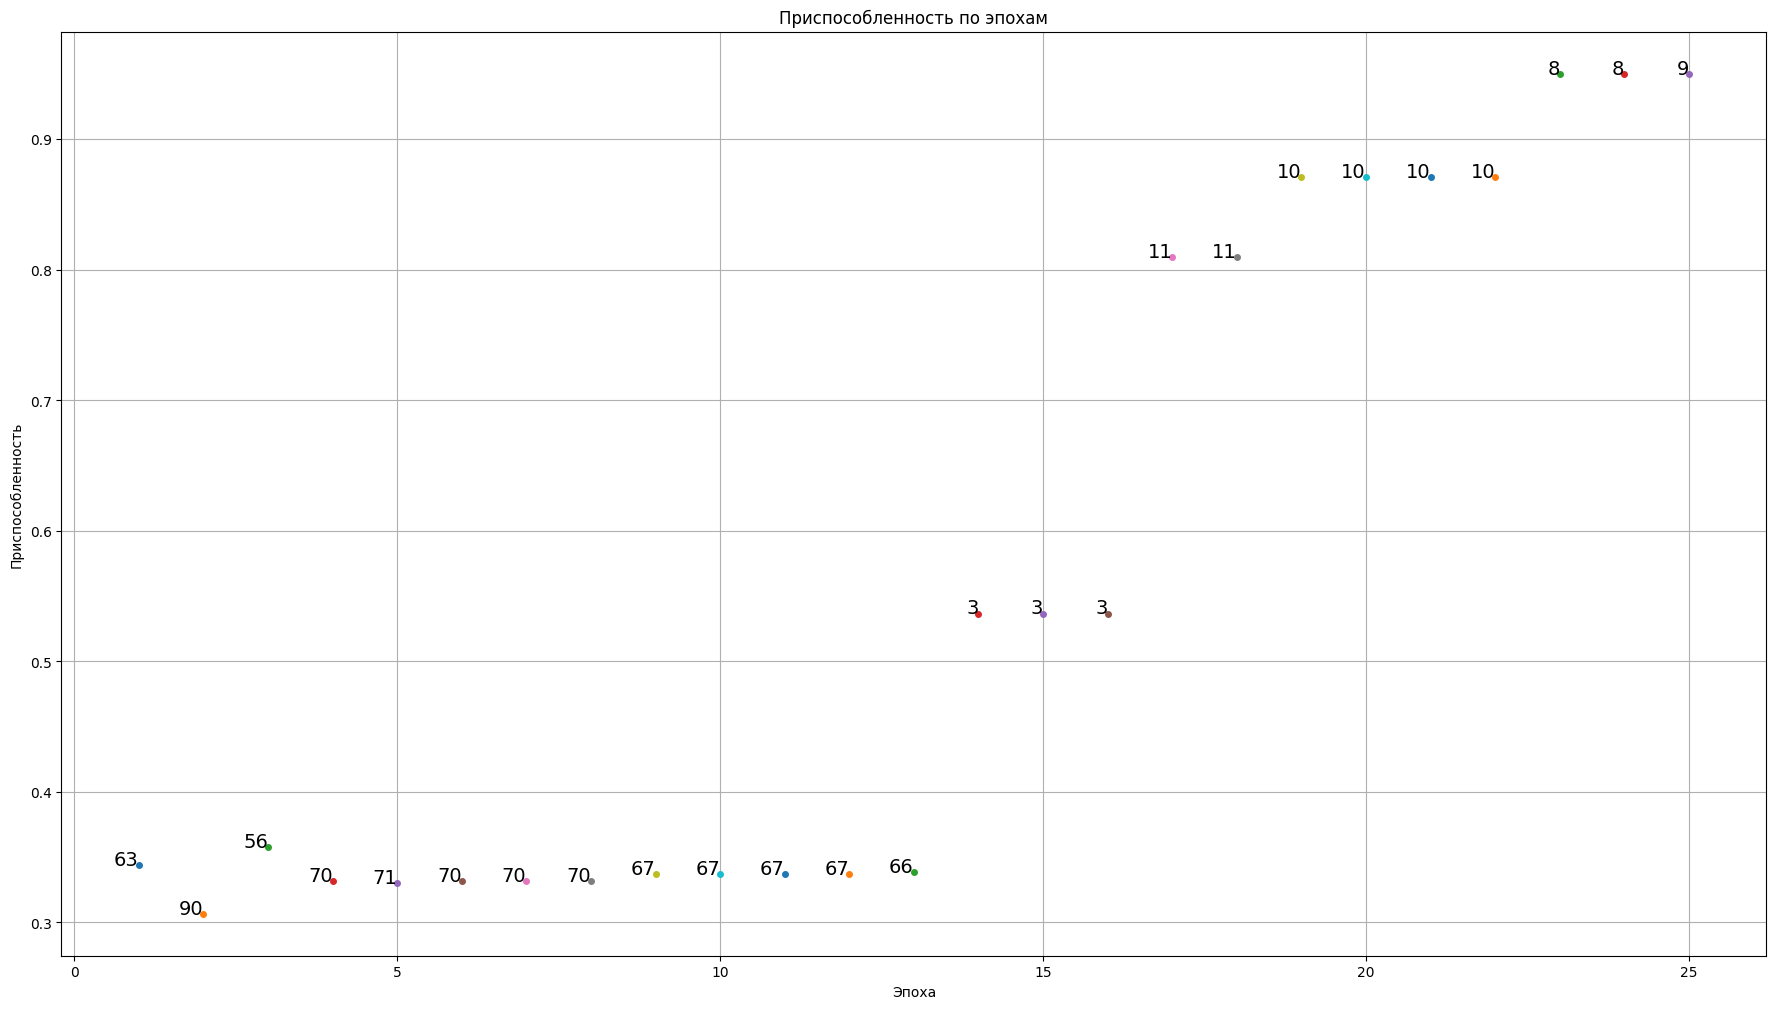

In [ ]:
# GeneticAlgorithm - generate answer, math - ЦЕЛОЧИСЛЕННОЕ КОДИРОВАНИЕ
import random, math

def generate_num():
    return random.randint(0, 255)

def create_population(num_individs):
    start_population = []
    for _ in range(num_individs):
        start_population.append(generate_num())
    return start_population

def fitness(individ):
    func = math.log(individ + 1) - 2.25
    F = 1 / (abs(func) + 1)
    return F

def all_fitness(population):
    pop_fit = []
    for i in range(len(population)):
        pop_fit.append(fitness(population[i]))
        # print(f"Приспособленность особи #{i+1} равна: {pop_fit[i]}\n")
    return pop_fit

def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = max(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
    return selected_individs

def to_binary(individ):
    bin_code = "{0:b}".format(individ).zfill(8);
    return bin_code

def to_decimal(bin_code):
    num = int(bin_code, 2)
    return num

def all_to_binary(population):
    binary_pop = []
    for individ in population:
        binary_pop.append(to_binary(individ))
    return binary_pop

def all_to_decimal(population):
    decimal_pop = []
    for individ in population:
        decimal_pop.append(to_decimal(individ))
    return decimal_pop

def crossover(parent_1, parent_2):
    # dot = random.randint(0, len(parent_1) - 1)
    # return parent_1[:dot] + parent_2[dot:],parent_2[:dot] + parent_1[dot:]
    # return parent_1[:12] + parent_2[12:],parent_2[:12] + parent_1[12:]

    point1 = random.randint(0, len(parent_1) - 1)
    point2 = random.randint(0, len(parent_1) - 1)
    if point1 > point2:
        point1, point2 = point2, point1
    child_1 = parent_1[:point1] + parent_2[point1:point2] + parent_1[point2:]
    child_2 = parent_2[:point1] + parent_1[point1:point2] + parent_2[point2:]
    return child_1, child_2

def mutation(bin_individ, chance):
    res = ""
    for symb in bin_individ:
        if (chance > random.random()):
            res += "1" if symb == '0' else '0'
        else:
            res += symb
    return res

def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, chance_mutation))
            new_pop.append(mutation(child_2, chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop

def print_array(array):
    for el in array:
        print(el)

def MAXFIT_NUM(pop, all_fitness):
  max_fitness_individ = all_fitness.index(max(all_fitness))
  best_num = pop[max_fitness_individ]
  return best_num, all_fitness[max_fitness_individ]

def INCUBATOR():
    print("INCUBATOR START...\n\n")
    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    start_population = create_population(size_population)
    # print("start pop:\n", start_population)
    # print("\n---------------------------------------------------------\n")
    result_population = start_population

    # for static
    fitness_of_best_nums_for_static = []
    best_nums_for_static = []
    # end.

    for era in range(100000):
        population_fitness = all_fitness(result_population)
        # for static
        b_num, b_fit = MAXFIT_NUM(result_population, population_fitness)
        fitness_of_best_nums_for_static.append(b_fit)
        best_nums_for_static.append(b_num)
        # end

        if any(fit > 0.95 for fit in population_fitness):
          # print(f"ERA #{era}\nresult population:\n")
          print("ERA #", era)
          print("\nresult population:\n")
          print_array(result_population)
          print("\n\nINCUBATOR END.\n\n")
          break

        population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population), 2)
        binary_population_for_crossover = all_to_binary(population_for_crossover)
        new_population = crossing(binary_population_for_crossover, chance_crossing, chance_mutation, size_population)
        new_population = all_to_decimal(new_population)
        result_population = new_population

        # print(f"ERA #{era}\nresult population:\n",result_population)
        # print("ERA #",era)
        # print("\nresult population:\n")
        # print_array(result_population)
    return fitness_of_best_nums_for_static, best_nums_for_static

# MAIN
static, nums = INCUBATOR()

print(static, nums)

import matplotlib.pyplot as plt

def plot_fitness_by_epoch(fitness_by_epoch, best_nums_by_epoch):
  epochs = range(1, len(fitness_by_epoch) + 1) # Эпохи начинаются с 1
  plt.figure(figsize=(22, 12))

  for epoch, (fitness, num) in enumerate(zip(fitness_by_epoch, best_nums_by_epoch), start=1):
    plt.plot(epoch, fitness, marker='o', markersize=4, label=f'Epoch {epoch}')
    plt.text(epoch, fitness, num, fontsize=14, ha='right', color='black')

  plt.xlabel('Эпоха')
  plt.ylabel('Приспособленность')
  plt.title('Приспособленность по эпохам')
  plt.grid(True)
  plt.show()

if (len(static) < 500):
    plot_fitness_by_epoch(static, nums)


INCUBATOR START...


enter eps: 0.000001
enter size population: 300
enter chance mutation: 13
enter chance crossing: 90
ERA # 9

result population:

...
{8.487864477796021: 0.5}
{8.488507145607583: 0.5}
{8.488303201057626: 0.5}
{8.487736089861508: 0.5}
{8.487732653006287: 0.5}
{8.487401205135047: 0.5}
{8.486866516926458: 0.5}
...


INCUBATOR END.


[0.025161870105592676, 0.01549652764071352, 0.015854357490932447, 0.0025266267371715223, 0.002834631149221334, 0.00023174076065890503, 1.6191479080607252e-05, 4.5263366276415695e-05, 1.9386232770202128e-06, 2.6719017220955266e-08] [8.251985062891343, 8.635907908109687, 8.63935654056819, 8.463794127936154, 8.514668221551071, 8.485537395982838, 8.487582217125874, 8.48730639921519, 8.487754229521894, 8.487736089861508]


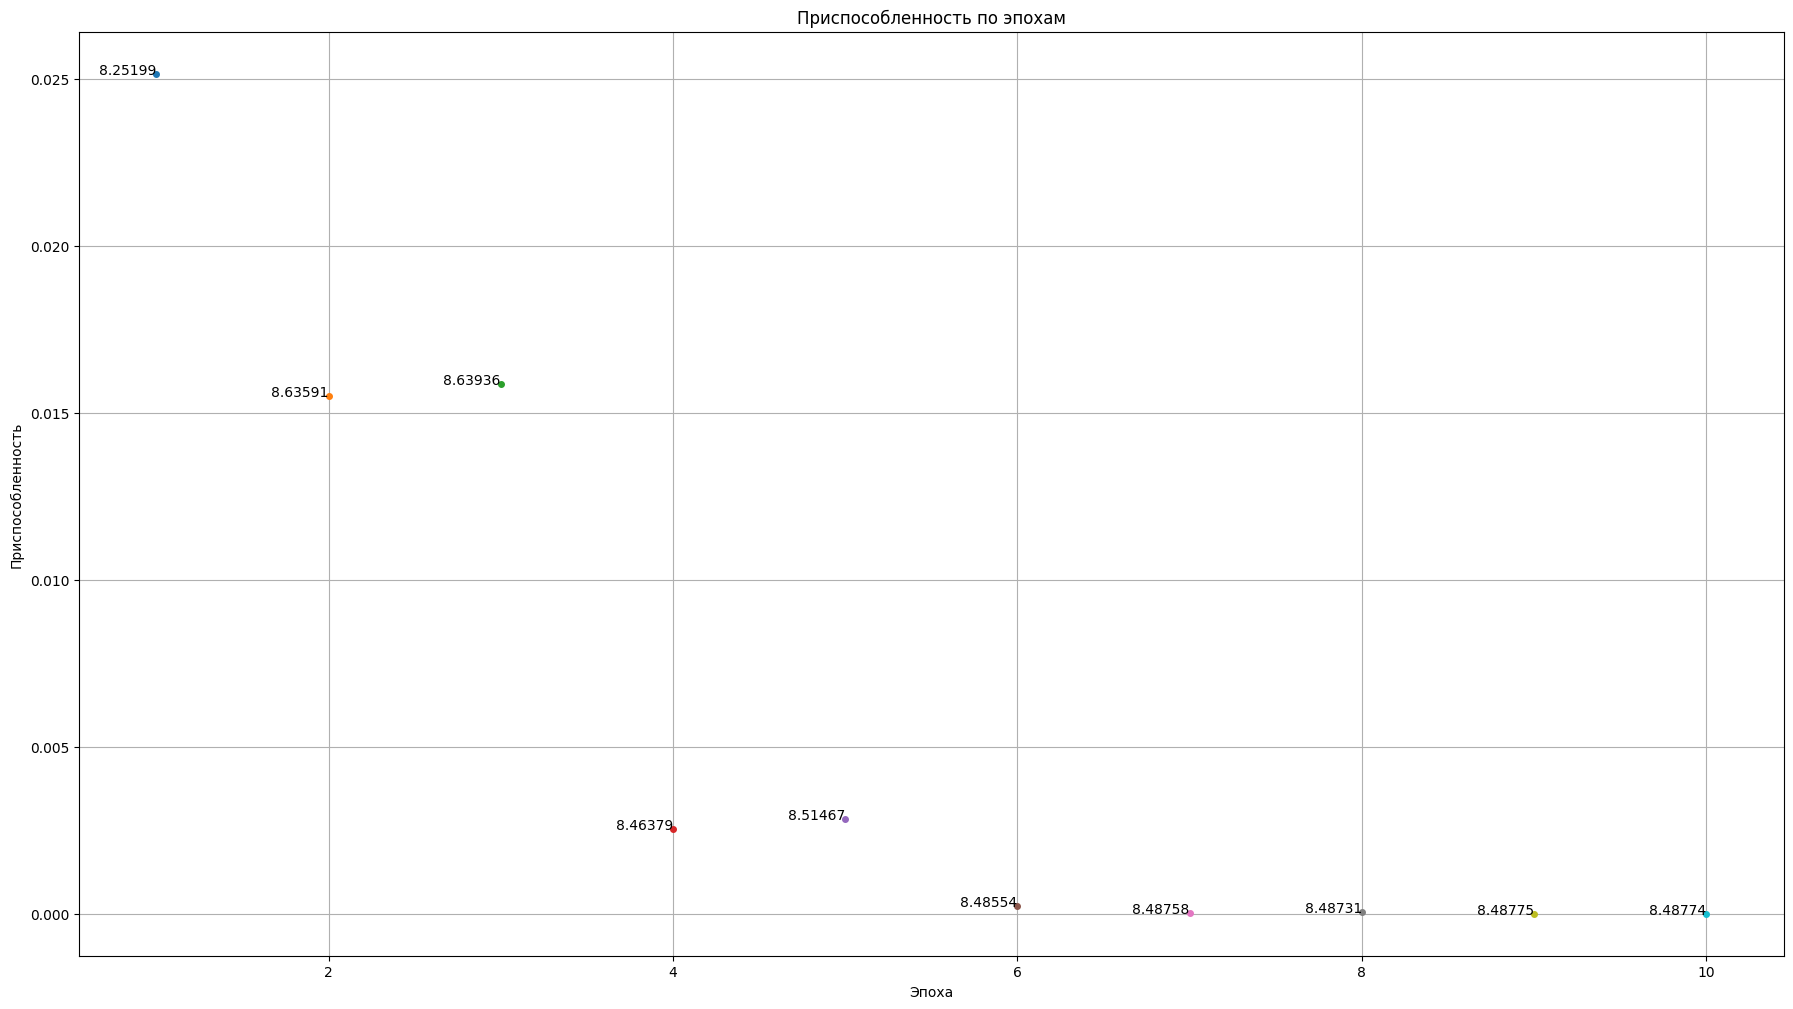

In [ ]:
# GeneticAlgorithm - generate answer, math - ВЕЩЕСТВЕННОЕ КОДИРОВАНИЕ
import random, math

def generate_num():
    return random.uniform(0, 255)

def create_population(num_individs):
    start_population = []
    for _ in range(num_individs):
        start_population.append(generate_num())
    return start_population

def fitness(individ):
    func = math.log(individ + 1) - 2.25
    return abs(func)

def all_fitness(population):
    pop_fit = []
    for i in range(len(population)):
        pop_fit.append(fitness(population[i]))
        # print(f"Приспособленность особи #{i+1} равна: {pop_fit[i]}\n")
    return pop_fit

def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = min(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
        # print(selected_individs)
    return selected_individs


def crossover(parent_1, parent_2):
    alpha = random.random()
    child_1 = alpha * parent_1 + (1 - alpha) * parent_2
    child_2 = (1 - alpha) * parent_1 + alpha * parent_2
    return child_1, child_2

def mutation(individ, min_value, max_value, chance):
    if (chance > random.random()):
      deviation = (max_value - min_value) * 0.1
      individ += random.uniform(-deviation, deviation)
      individ = max(min(individ, max_value), min_value)
    return individ

def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, min(population), max(population), chance_mutation))
            new_pop.append(mutation(child_2, min(population), max(population), chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop

def print_array(array):
    for el in array:
        print({el:.5})

def MAXFIT_NUM(pop, all_fitness):
  max_fitness_individ = all_fitness.index(min(all_fitness))
  best_num = pop[max_fitness_individ]
  return best_num, all_fitness[max_fitness_individ]

def INCUBATOR():
    print("INCUBATOR START...\n\n")
    eps = float(input("enter eps: "))
    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    start_population = create_population(size_population)
    # print("start pop:\n", start_population)
    # print("\n---------------------------------------------------------\n")
    result_population = start_population

    # for static
    fitness_of_best_nums_for_static = []
    best_nums_for_static = []
    # end.

    for era in range(1000):
        population_fitness = all_fitness(result_population)
        # for static
        b_num, b_fit = MAXFIT_NUM(result_population, population_fitness)
        fitness_of_best_nums_for_static.append(b_fit)
        best_nums_for_static.append(b_num)
        # end

        if any(((fit) < eps) for fit in population_fitness):
          # print(f"ERA #{era}\nres9ult population:\n")
          print("ERA #", era)
          print("\nresult population:\n")
          best_fit = min(population_fitness)
          index = population_fitness.index(best_fit)
          res_pop = result_population[index - 3:index + 4]
          print("...")
          print_array(res_pop)
          print("...")
          print("\n\nINCUBATOR END.\n\n")
          break

        population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population/5), 4)
        new_population = crossing(population_for_crossover, chance_crossing, chance_mutation, int(size_population/2))
        result_population = new_population

        # print(f"ERA #{era}\nresult population:\n",result_population)
        # print("ERA #",era)
        # print("\nresult population:\n")9
        # if era%100 == 0:
        #   print("-------------------------------------------")
        #   print_array(result_population)
    return fitness_of_best_nums_for_static, best_nums_for_static

# MAIN
static, nums = INCUBATOR()

print(static, nums)

import matplotlib.pyplot as plt

def plot_fitness_by_epoch(fitness_by_epoch, best_nums_by_epoch):
    epochs = range(1, len(fitness_by_epoch) + 1)  # Эпохи начинаются с 1
    plt.figure(figsize=(22, 12))

    for epoch, (fitness, num) in enumerate(zip(fitness_by_epoch, best_nums_by_epoch), start=1):
        plt.plot(epoch, fitness, marker='o', markersize=4, label=f'Epoch {epoch}')
        formatted_num = f'{num:.5f}'
        plt.text(epoch, fitness, formatted_num, fontsize=10, ha='right', color='black')

    plt.xlabel('Эпоха')
    plt.ylabel('Приспособленность')
    plt.title('Приспособленность по эпохам')
    plt.grid(True)
    plt.show()

if (len(static) < 500):
    plot_fitness_by_epoch(static, nums)